In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","LAST MOD BY","CLIP LENGTH","OFFSET","DURATION"])
frame.head()

,IN FILE,CLIP LENGTH,OFFSET,DURATION,LAST MOD BY
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,alarce
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,alarce
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,alarce
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,alarce
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,alarce


In [3]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    spec_to = '-'.join(spec[:-2])
    return spec_to

frame['GENUS'] = frame.apply (lambda row: species(row), axis=1)
frame.head()

,IN FILE,CLIP LENGTH,OFFSET,DURATION,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,alarce,Aburria
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,alarce,Aburria
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,alarce,Aburria
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,alarce,Aburria
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,alarce,Aburria


In [4]:
LAST_MOD_BY = frame.groupby('IN FILE')[['LAST MOD BY']].max()
GENUS = frame.groupby('IN FILE')[['GENUS']].max()

In [5]:
IQR_DURATION = frame.groupby('IN FILE')[['DURATION']].quantile([.25,.5,.75])
IQR_DURATION = IQR_DURATION.unstack(1)
IQR_DURATION = IQR_DURATION['DURATION'].rename_axis([None], axis=1)
IQR_DURATION = IQR_DURATION.join(LAST_MOD_BY)
IQR_DURATION = IQR_DURATION.join(GENUS).reset_index()
IQR_DURATION = IQR_DURATION.rename(columns = {.25:'0.25',.5:'0.5',.75:'0.75'})
IQR_DURATION.head()

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,2.665400,3.3205,3.3855,alarce,Aburria
1,Aburria-aburri-387212.wav,3.110000,3.1400,3.1700,alarce,Aburria
2,Accipiter-bicolor-451839.wav,0.202975,0.2155,0.2215,alarce,Accipiter
3,Accipiter-collaris-260335.wav,0.895100,1.0301,1.0876,alarce,Accipiter
4,Accipiter-collaris-260336.wav,0.515075,0.5701,0.6700,alarce,Accipiter


In [6]:
annotator = IQR_DURATION['LAST MOD BY'].unique()
sampled_annotator = ['EdZamora','kkong'] #random.sample(list(annotator),1)
print(sampled_annotator)
annotator_df = IQR_DURATION[IQR_DURATION['LAST MOD BY'].isin(sampled_annotator)]

# genus_counts = annotator_df['GENUS'].value_counts()
# sampled_genus = genus_counts.index[:5]#random.sample(list(genus)counts),1)
# print(sampled_genus)

genus = annotator_df[['LAST MOD BY','GENUS']].groupby(['GENUS','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
genus['LAST MOD BY'] = (genus['LAST MOD BY']+' '+genus['COUNT'].astype(str))
genus = genus.drop(columns = ['COUNT']).groupby('GENUS')['LAST MOD BY'].apply(list).to_dict()
shared_genus_anns = [i for i in genus if len(genus.get(i)) == 2]
print(shared_genus_anns)

IQR_DURATION = annotator_df[annotator_df['GENUS'].isin(shared_genus_anns)] # shared_genus_anns
IQR_DURATION

['EdZamora', 'kkong']
Index(['Tangara', 'Psarocolius', 'Schiffornis', 'Saltator', 'Euphonia'], dtype='object')


,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
788,Euphonia-chlorotica-264822.wav,0.482500,0.56505,0.832600,EdZamora,Euphonia
789,Euphonia-chlorotica-392016.wav,0.230000,0.33000,0.540000,EdZamora,Euphonia
791,Euphonia-chrysopasta-171246.wav,1.312500,1.46000,1.694750,kkong,Euphonia
793,Euphonia-cyanocephala-275607.wav,3.408800,4.13860,4.198550,kkong,Euphonia
798,Euphonia-laniirostris-45661.wav,0.329925,0.42495,0.607400,EdZamora,Euphonia
799,Euphonia-mesochrysa-468090.wav,0.225000,0.31000,0.510000,EdZamora,Euphonia
801,Euphonia-rufiventris-427361.wav,2.362800,2.51530,2.667800,kkong,Euphonia
802,Euphonia-rufiventris-65575.wav,1.140000,1.15000,1.165000,kkong,Euphonia
1744,Psarocolius-angustifrons-122307.wav,1.515075,1.55500,1.602500,EdZamora,Psarocolius
1745,Psarocolius-angustifrons-27823.wav,0.802500,0.98490,1.217500,kkong,Psarocolius


In [7]:
IQR_OFFSET = frame.groupby('IN FILE')[['OFFSET']].quantile([.25,.5,.75])
IQR_OFFSET = IQR_OFFSET.unstack(1)
IQR_OFFSET = IQR_OFFSET['OFFSET'].rename_axis([None], axis=1)
IQR_OFFSET = IQR_OFFSET.join(LAST_MOD_BY)
IQR_OFFSET = IQR_OFFSET.join(GENUS).reset_index()
IQR_OFFSET = IQR_OFFSET.rename(columns = {.25:'0.25',.5:'0.5',.75:'0.75'})
IQR_OFFSET.head()

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,4.546700,6.73200,12.987900,alarce,Aburria
1,Aburria-aburri-387212.wav,15.521100,30.44110,54.061100,alarce,Aburria
2,Accipiter-bicolor-451839.wav,1.754000,2.75345,3.760200,alarce,Accipiter
3,Accipiter-collaris-260335.wav,6.441750,17.87295,29.574150,alarce,Accipiter
4,Accipiter-collaris-260336.wav,5.994075,8.05175,18.697625,alarce,Accipiter


In [8]:
X = IQR_DURATION.drop(columns = ['IN FILE','GENUS','LAST MOD BY']) # expand to taxa rather than species

Y = np.array(IQR_DURATION['GENUS'])
Y_2 = np.array(IQR_DURATION['LAST MOD BY'])
Y_3 = np.array(IQR_DURATION['IN FILE'])

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-0.97274212, -0.95057531, -0.8649164 ],
       [-1.30138198, -1.21184651, -1.12838141],
       [ 0.10753941,  0.04421157, -0.08861306],
       [ 2.83596613,  3.02162498,  2.16587663],
       [-1.1713252 , -1.10630428, -1.06769261],
       [-1.3078897 , -1.23407762, -1.15539422],
       [ 1.47455109,  1.21723642,  0.78754765],
       [-0.11697693, -0.30037074, -0.56561439],
       [ 0.37119969,  0.14980937, -0.17167748],
       [-0.55624804, -0.4838886 , -0.51834196],
       [ 0.85931123,  1.03371855,  1.6852736 ],
       [-0.49455485, -0.62283308, -0.82232619],
       [-0.41968353, -0.53385304, -0.54535478],
       [ 0.91111268,  0.82218948,  0.5551924 ],
       [ 1.32448306,  0.99459179,  0.48338333],
       [ 1.19758252,  0.81129623,  0.35732352],
       [ 0.30914858,  0.08300486, -0.24828132],
       [-0.29268537, -0.35039075, -0.5228441 ],
       [ 0.9498987 ,  0.63300268,  0.21298504],
       [-1.05734248, -1.05622869, -1.15314315],
       [ 1.18320046,  0.87665572,  0.374

In [10]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std) 

tsneed = pd.DataFrame(tsne_results, columns = ['TSNE1','TSNE2','TSNE3']) # ,'TSNE4','TSNE5','TSNE6'
tsneed

C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 48 nearest neighbors...
[t-SNE] Indexed 49 samples in 0.000s...
[t-SNE] Computed neighbors for 49 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 49 / 49
[t-SNE] Mean sigma: 2.157263
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.394691
[t-SNE] KL divergence after 300 iterations: 2.996577


,TSNE1,TSNE2,TSNE3
0,-15.316580,89.409630,21.870428
1,195.874069,-415.110718,-241.917740
2,209.358170,-302.407837,-109.269524
3,-34.974449,63.205853,69.115265
4,-43.883667,85.383934,-87.980972
5,-138.471680,49.909786,211.897903
6,4.285407,-4.287515,25.389982
7,346.596375,48.122673,71.789688
8,293.999695,-661.218018,-1005.391113
9,-251.277100,-278.004120,-231.730011


In [11]:
wcss = []
for i in range(1,21):
    kmeans_iqr = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_iqr.fit(tsne_results)
    wcss.append(kmeans_iqr.inertia_)

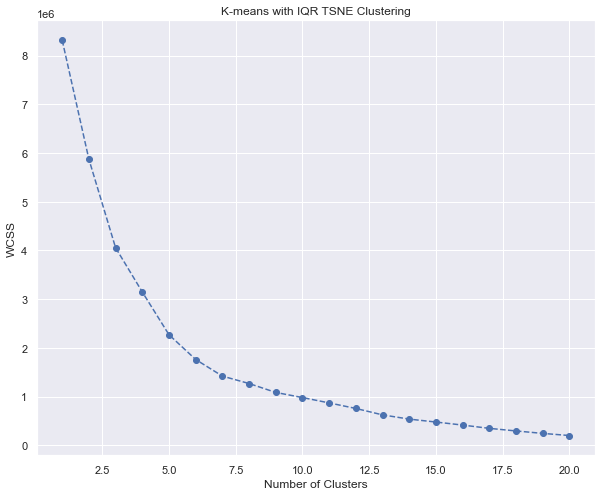

In [12]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with IQR TSNE Clustering')
plt.show()

In [13]:
kmeans_iqr = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
kmeans_iqr.fit(tsne_results)

KMeans(n_clusters=5, random_state=42)

In [14]:
df_segm_iqr_kmeans = pd.concat([X.reset_index(drop = True), pd.DataFrame(tsne_results,columns = tsneed.columns)], axis = 1)

df_segm_iqr_kmeans['Segment K-means IQR'] = kmeans_iqr.labels_
df_segm_iqr_kmeans['Cluster'] = df_segm_iqr_kmeans['Segment K-means IQR'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'})
df_segm_iqr_kmeans['IN FILE'],df_segm_iqr_kmeans['LAST MOD BY'], df_segm_iqr_kmeans['Genus'] = Y_3,Y_2, Y

In [15]:
df_segm_iqr_kmeans

,0.25,0.5,0.75,TSNE1,TSNE2,TSNE3,Segment K-means IQR,Cluster,IN FILE,LAST MOD BY,Genus
0,0.482500,0.56505,0.832600,-15.316580,89.409630,21.870428,1,second,Euphonia-chlorotica-264822.wav,EdZamora,Euphonia
1,0.230000,0.33000,0.540000,195.874069,-415.110718,-241.917740,0,first,Euphonia-chlorotica-392016.wav,EdZamora,Euphonia
2,1.312500,1.46000,1.694750,209.358170,-302.407837,-109.269524,0,first,Euphonia-chrysopasta-171246.wav,kkong,Euphonia
3,3.408800,4.13860,4.198550,-34.974449,63.205853,69.115265,1,second,Euphonia-cyanocephala-275607.wav,kkong,Euphonia
4,0.329925,0.42495,0.607400,-43.883667,85.383934,-87.980972,1,second,Euphonia-laniirostris-45661.wav,EdZamora,Euphonia
5,0.225000,0.31000,0.510000,-138.471680,49.909786,211.897903,1,second,Euphonia-mesochrysa-468090.wav,EdZamora,Euphonia
6,2.362800,2.51530,2.667800,4.285407,-4.287515,25.389982,1,second,Euphonia-rufiventris-427361.wav,kkong,Euphonia
7,1.140000,1.15000,1.165000,346.596375,48.122673,71.789688,1,second,Euphonia-rufiventris-65575.wav,kkong,Euphonia
8,1.515075,1.55500,1.602500,293.999695,-661.218018,-1005.391113,3,fourth,Psarocolius-angustifrons-122307.wav,EdZamora,Psarocolius
9,0.802500,0.98490,1.217500,-251.277100,-278.004120,-231.730011,0,first,Psarocolius-angustifrons-27823.wav,kkong,Psarocolius


In [17]:
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np


fig = px.scatter_3d(df_segm_iqr_kmeans, 
                    x='TSNE1',
                    y='TSNE2',
                    z='TSNE3' , 
                    color = df_segm_iqr_kmeans['Cluster'],
                    hover_name = list(tuple(zip(df_segm_iqr_kmeans['IN FILE'],df_segm_iqr_kmeans['LAST MOD BY'])))) 


#color = Y, color_discrete_sequence= px.colors.qualitative.G10)


clust_1 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'first']
x, y, z = clust_1['TSNE1'], clust_1['TSNE2'], clust_1['TSNE3']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightblue', opacity=0.50)]).data[0])


clust_2 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'second']
x2, y2, z2 = clust_2['TSNE1'], clust_2['TSNE2'], clust_2['TSNE3']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x2, y=y2, z=z2, color='lightblue', opacity=0.50)]).data[0])


clust_3 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'third']
x3, y3, z3 = clust_3['TSNE1'], clust_3['TSNE2'], clust_3['TSNE3']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x3, y=y3, z=z3, color='lightblue', opacity=0.50)]).data[0])


clust_4 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'fourth']
x4, y4, z4 = clust_4['TSNE1'], clust_4['TSNE2'], clust_4['TSNE3']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x4, y=y4, z=z4, color='lightblue', opacity=0.50)]).data[0])


clust_5 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'fifth']
x5, y5, z5 = clust_5['TSNE1'], clust_5['TSNE2'], clust_5['TSNE3']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x5, y=y5, z=z5, color='lightblue', opacity=0.50)]).data[0])


fig.update_layout(title_text= (' & '.join(df_segm_iqr_kmeans['LAST MOD BY'].unique()) + ' Annotations'), title_x=0.5)
fig.show()

In [ ]:
kaleidoscope_format = pd.read_csv('for_data_science_newline_fixed.csv')
for_kaleidoscope = kaleidoscope_format[kaleidoscope_format['IN FILE'].isin(df_segm_iqr_kmeans['IN FILE'].to_list())] 
for_kaleidoscope

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
10032,Euphonia-chlorotica-264822.wav,27.742,0.8974,0.5000,24000,0,44100,Euphonia chlorotica Purple-throated Euphonia,84.003,EdZamora,11/21/2021,15:28:43
10033,Euphonia-chlorotica-264822.wav,27.742,1.7304,0.5601,24000,0,44100,Euphonia chlorotica Purple-throated Euphonia,84.008,EdZamora,11/21/2021,15:28:43
10034,Euphonia-chlorotica-264822.wav,27.742,2.1405,0.4100,24000,0,44100,Euphonia chlorotica Purple-throated Euphonia,84.009,EdZamora,11/21/2021,15:28:43
10035,Euphonia-chlorotica-264822.wav,27.742,4.8907,0.5700,24000,0,44100,Euphonia chlorotica Purple-throated Euphonia,84.011,EdZamora,11/21/2021,15:28:43
10036,Euphonia-chlorotica-264822.wav,27.742,5.4707,0.6001,24000,0,44100,Euphonia chlorotica Purple-throated Euphonia,84.011,EdZamora,11/21/2021,15:28:43
...,...,...,...,...,...,...,...,...,...,...,...,...
27184,Tangara-xanthocephala-45830.wav,23.400,13.9866,0.5300,24000,0,48000,Tangara xanthocephala Saffron-crowned Tanager,28.786,kkong,11/19/2021,04:19:18
27185,Tangara-xanthocephala-45830.wav,23.400,15.8166,0.7500,24000,0,48000,Tangara xanthocephala Saffron-crowned Tanager,28.788,kkong,11/19/2021,04:19:18
27186,Tangara-xanthocephala-45830.wav,23.400,18.4066,0.7200,24000,0,48000,Tangara xanthocephala Saffron-crowned Tanager,28.791,kkong,11/19/2021,04:19:18
27187,Tangara-xanthocephala-45830.wav,23.400,20.4766,0.4900,24000,0,48000,Tangara xanthocephala Saffron-crowned Tanager,28.794,kkong,11/19/2021,04:19:18
